## Numpy vs. Matlab
Quick snippits of how to do sutff in numpy if you are used to Matlab. Sort of taken from:
https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html

Python has import statements to add new libraries instead of adding this to the path like Matlab

In [1]:
import numpy as np

Logic for conditional statemetns

In [2]:
a = True
b = False
a and b

False

In [3]:
a or b

True

In [4]:
not a

False

Numbers

In [5]:
a=3
b=3.
c=3.0
a, b, c

(3, 3.0, 3.0)

Imaginary numbers

In [6]:
6j

6j

In [7]:
complex_number = complex(2, 3)
complex_number

(2+3j)

# For Loops
use the `in` keyword to iterate over lists (or iterators in general)

In [8]:
list(range(3))

[0, 1, 2]

In [9]:
lister = ['a','b','c']
for i in range(len(lister)):
    print(lister[i])

a
b
c


If you want to iterate but also want the number of the item you are on (zero indexing of course) use the `enumerate` function

In [10]:
for idx, let in enumerate(lister):
    print(idx, let)

0 a
1 b
2 c


If you want to iterate over two lists at the same time use the `zip` function as shown

In [11]:
lister2 = ['d','e','f', 'what']
for let, let2 in zip(lister, lister2):
    print(let, let2)

a d
b e
c f


Also the zip only goes until one of the lists runs out. Note that we did not see `what` printed out

And we can even make fancy stuff like this:

In [12]:
for idx, (let, let2) in enumerate(zip(lister, lister2)):
    print(idx, let, let2)  

0 a d
1 b e
2 c f


In case you were interested yo can also use zip one item at a time

In [13]:
z = zip(lister, lister2)

In [14]:
next(z)

('a', 'd')

Python also has this thing called list comprehension. 

In [15]:
num_lister= [1, 2, 3]
mylist = [a+3 for a in num_lister]
mylist

[4, 5, 6]

You can also do a similar thing with if statements

In [16]:
value = 3 if len(mylist) > 4 else 9
value

9

And yes you can combine them

In [17]:
mylist = [a if a != 'b' else 'what ever' for a in lister]
mylist

['a', 'what ever', 'c']

Python emphasizes readable code (for example forced indents) so do not make fancy list comprehensions that are undreadable. please use loops, if statements instead

In [18]:
unreadable = [a if a != 'ba' else 'what ever' for a in [c+'b' if c != 'a' else c+'a' for c in lister]]
unreadable

['aa', 'bb', 'cb']

# Path manipulation
you may be tempted to just use strings for path but we can do better than that

In [19]:
from pathlib import Path

In [20]:
a = Path('someth', 'to', 'a', 'file')
a

PosixPath('someth/to/a/file')

We can also append paths to strings or other paths with the `/` operator

In [21]:
b = Path('some', 'other', 'paht')
e = a / b / 'hello'
e

PosixPath('someth/to/a/file/some/other/paht/hello')

And if for some reason the function we gave the path object to complains and wants a string we can make it a string

In [22]:
str(e)

'someth/to/a/file/some/other/paht/hello'

# Numpy Arrays
Setup some variables as ndarrays

In [23]:
a = np.array([1, 2, 3, 4])
b = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
c = np.array([[1, 2, 3, 5], 
              [4, 5, 6, 8], 
              [7, 8, 9, 11]])

Number of dimensions

In [24]:
np.ndim(a)

1

size is like count the number of elements

In [25]:
np.size(a)

4

In [26]:
np.shape(a)

(4,)

In [27]:
b.ndim

2

In [28]:
b.size

9

In [29]:
b.shape

(3, 3)

I can slice shape where ever I want

In [30]:
c.shape

(3, 4)

In [31]:
np.shape(c)[-1]

4

In [32]:
c.shape[0]

3

## Slice Numpy arrays
slicing can get very complicated but we will just stay with te easy stuff

In [33]:
a

array([1, 2, 3, 4])

In [34]:
a[-1] # last index

4

In [35]:
a[1:3] # slice of index 1 and 2

array([2, 3])

In [36]:
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
b[:, 2] # first row, column index 2

array([3, 6, 9])

In [38]:
b[..., 2] # all dimensions up to but not including the last dimension, then I will index 2 of the last dimension

array([3, 6, 9])

In [39]:
a

array([1, 2, 3, 4])

In [40]:
a[:-2] # slice from 0 to second to last item

array([1, 2])

In [41]:
a[[3,1,2,3,1,1]] # fancy indexing using an array to index

array([4, 2, 3, 4, 2, 2])

## Operations with arrays
Transpose

In [42]:
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [43]:
b.transpose() # or b.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Element wise multiply

In [44]:
b * b

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

Matrix Mulitply with the dot function of the object

In [45]:
b.dot(b) # the dot is like a matrix multiply

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

Matrix multiply with the numpy dot

In [46]:
np.dot(b, b)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

Element wise multiply via broadcasting

In [47]:
a.shape

(4,)

In [48]:
c.shape

(3, 4)

In [49]:
a, c

(array([1, 2, 3, 4]),
 array([[ 1,  2,  3,  5],
        [ 4,  5,  6,  8],
        [ 7,  8,  9, 11]]))

In [50]:
c * a

array([[ 1,  4,  9, 20],
       [ 4, 10, 18, 32],
       [ 7, 16, 27, 44]])

In [51]:
np.ones((2,3,4)) * np.ones((4,))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

Exponents are the ```**``` operator in python not `^`

In [52]:
2**3

8

Elementwise exponentiation

In [53]:
a ** 2

array([ 1,  4,  9, 16])

Flatten an array means to remove the shape and just list the elements individually

In [54]:
d = b.flatten()
d, b

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

Note Numpy does have support for Matrices. Matrices have different rules for example ```a*b``` is elementwise for ndarrays but it is matrix multiplication for matrices

In [55]:
A = np.matrix([[1,2],[3,4]])
A

matrix([[1, 2],
        [3, 4]])

In [56]:
B = np.matrix([[1,2],[8,9],[4,3]])
B

matrix([[1, 2],
        [8, 9],
        [4, 3]])

In [57]:
B * A

matrix([[ 7, 10],
        [35, 52],
        [13, 20]])

Generally we won't use matrices because we will work with Tensors which in general have many dimensions and not exactly 2. The ndarray does this for us because it hands n dimensional arrays.

# Plotting

In [58]:
import matplotlib.pyplot as plt

Plotting in python is simialr to Matlab when using matplotlib. You can usually make calls like you would in Matlab by sticking ```plt``` in front.

For example to make a sine curve plot with labels:

<Figure size 640x480 with 0 Axes>

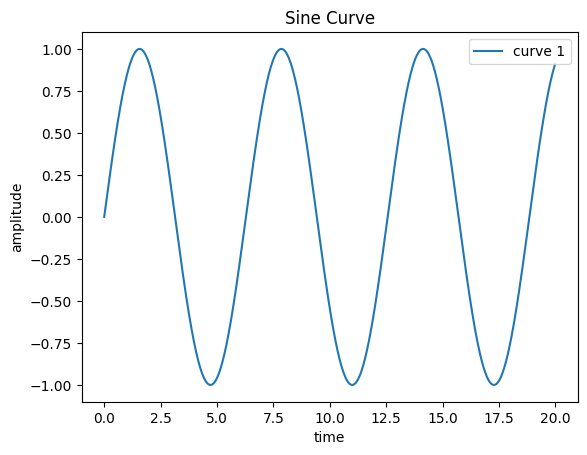

In [59]:
plt.clf() # this helps in jupyter to not overwrite figures
plt.figure()
x = np.arange(0, 20, 0.01)
y = np.sin(x)
plt.plot(x, y)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Sine Curve')
plt.legend(['curve 1'])
plt.show()

Outside Jupyter to show a figure we need to call ```plt.show()``` which will pause and wait until you close the figure. However Jupyter will usually show figures when you make them in a cell anyway.

You can even put strings in to modify the markers like in Matlab

<Figure size 640x480 with 0 Axes>

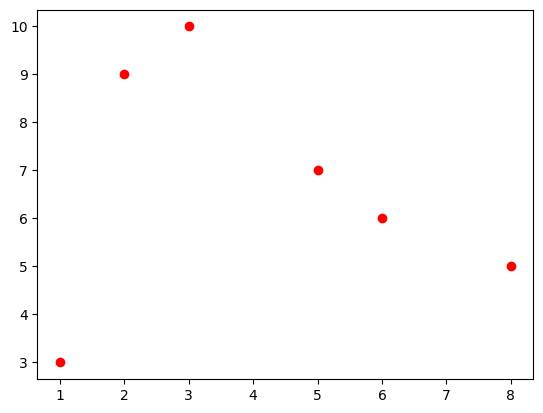

In [60]:
plt.clf() # this helps in jupyter to not overwrite figures
plt.figure()
x = np.array([1, 5, 6, 8 , 2 , 3])
y = np.array([3, 7 , 6 , 5, 9, 10])
plt.plot(x, y, 'ro') # note the string input like Matlab to make red large dots 'ro'
plt.show()